# 00. Data Exploration

This notebook:
- Loads the original raw dataset
- Performs an initial overview of the dataset structure and contents  
- Summarizes basic data information and missing values 
- Explores variable distribution and correlation  
- Identifies potential outliers  
- Generates basic visualizations

## 1. Importing Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

## 2. Loading and Exploring the Data

### 2.1 Loading the Dataset

In [2]:
# Set display opions
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Read data
print("Reading data...")
df = pd.read_csv('../data/raw/alcohol_consumption_raw.csv')
print("Data loaded successfully!")

Reading data...
Data loaded successfully!


### 2.2 Basic Data Infromation

In [3]:
print(f"Data shape: {df.shape}")

Data shape: (991346, 24)


The dataset consists of **991,346 records** and **24 features**, representing a comprehensive collection of health and demographic information.

In [4]:
print(df.head())

    sex  age  height  weight  waistline  sight_left  sight_right  hear_left  \
0  Male   35     170      75       90.0         1.0          1.0        1.0   
1  Male   30     180      80       89.0         0.9          1.2        1.0   
2  Male   40     165      75       91.0         1.2          1.5        1.0   
3  Male   50     175      80       91.0         1.5          1.2        1.0   
4  Male   50     165      60       80.0         1.0          1.2        1.0   

   hear_right    SBP   DBP   BLDS  tot_chole  HDL_chole  LDL_chole  \
0         1.0  120.0  80.0   99.0      193.0       48.0      126.0   
1         1.0  130.0  82.0  106.0      228.0       55.0      148.0   
2         1.0  120.0  70.0   98.0      136.0       41.0       74.0   
3         1.0  145.0  87.0   95.0      201.0       76.0      104.0   
4         1.0  138.0  82.0  101.0      199.0       61.0      117.0   

   triglyceride  hemoglobin  urine_protein  serum_creatinine  SGOT_AST  \
0          92.0        17.1   

**Dataset Feature Overview**

The dataset includes **24 features** categorized into five main groups:

| **Feature Category**       | **Examples**                                                           |
|----------------------------|------------------------------------------------------------------------|
| **Demographics**           | Age, Sex                                                               |
| **Physical Measurements**  | Height, Weight, Waistline                                              |
| **Vision/Hearing**         | Left/Right Eyesight, Left/Right Hearing                                |
| **Physiological Indicators** | SBP, DBP, Cholesterol (HDL/LDL), AST, ALT, γ-GTP                    |
| **Lifestyle Factors**      | Drinking Status (`DRK_YN`)        |


In [5]:
print("\nData types:")
print(df.dtypes)


Data types:
sex                  object
age                   int64
height                int64
weight                int64
waistline           float64
sight_left          float64
sight_right         float64
hear_left           float64
hear_right          float64
SBP                 float64
DBP                 float64
BLDS                float64
tot_chole           float64
HDL_chole           float64
LDL_chole           float64
triglyceride        float64
hemoglobin          float64
urine_protein       float64
serum_creatinine    float64
SGOT_AST            float64
SGOT_ALT            float64
gamma_GTP           float64
SMK_stat_type_cd    float64
DRK_YN               object
dtype: object


**Data Types Overview**

The dataset includes a combination of categorical and numerical features. 

- **Categorical features** (data type: `object`) include `sex` and `DRK_YN`, which represent gender and drinking status, respectively. These variables will require encoding before modeling.
- **Integer features** (data type: `int64`) include `age`, `height`, and `weight`, which are typical demographic and physical measurements.
- **Floating-point features** (data type: `float64`) make up the majority of the dataset. These include physiological and examination indicators such as `waistline`, `SBP`, `DBP`, `cholesterol levels` (e.g., `HDL_chole`, `LDL_chole`), liver enzymes (`SGOT_AST`, `SGOT_ALT`), and hearing/vision data (e.g., `sight_left`, `hear_right`).


In [6]:
print("\nBasic statistical description:")
print(df.describe())


Basic statistical description:
                 age         height         weight      waistline  \
count  991346.000000  991346.000000  991346.000000  991346.000000   
mean       47.614491     162.240625      63.284050      81.233358   
std        14.181339       9.282957      12.514241      11.850323   
min        20.000000     130.000000      25.000000       8.000000   
25%        35.000000     155.000000      55.000000      74.100000   
50%        45.000000     160.000000      60.000000      81.000000   
75%        60.000000     170.000000      70.000000      87.800000   
max        85.000000     190.000000     140.000000     999.000000   

          sight_left    sight_right      hear_left     hear_right  \
count  991346.000000  991346.000000  991346.000000  991346.000000   
mean        0.980834       0.978429       1.031495       1.030476   
std         0.605949       0.604774       0.174650       0.171892   
min         0.100000       0.100000       1.000000       1.000000   
2

### 2.3 Check Missing Values

In [7]:
missing_values = df.isnull().sum()
print("Number of missing values in each column:")
print(missing_values[missing_values > 0])
#no NaN

Number of missing values in each column:
Series([], dtype: int64)


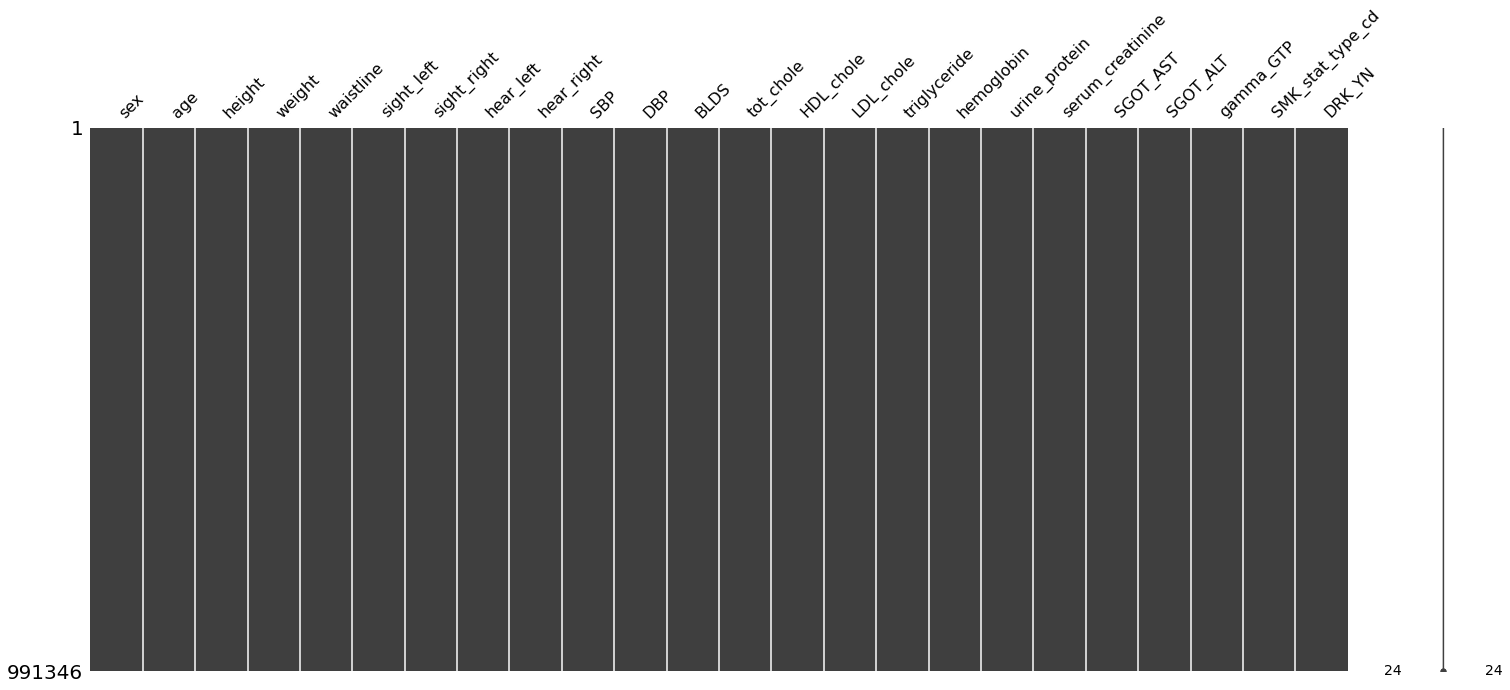

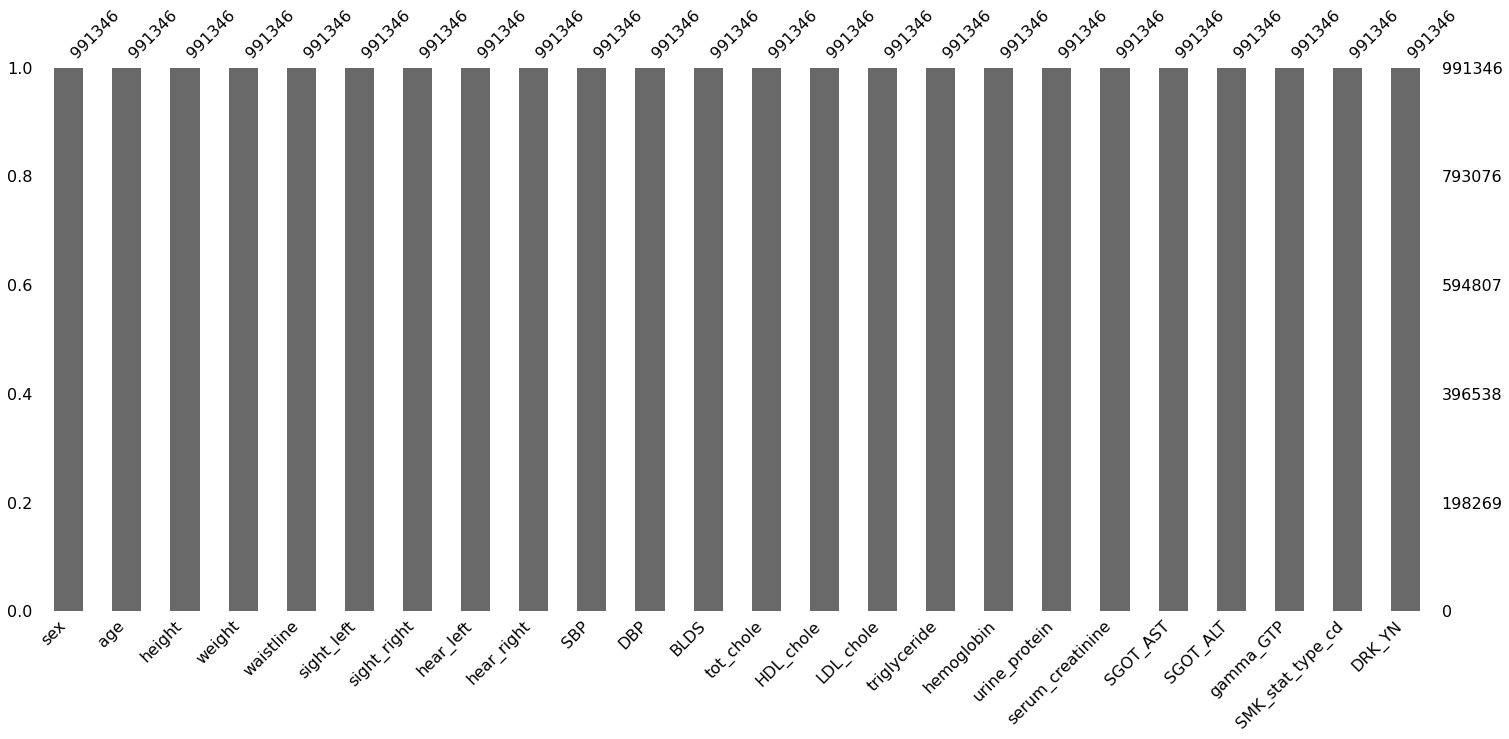


Missing Values Summary:
Series([], dtype: int64)

Missing Values Percentage:
Series([], dtype: float64)


In [8]:
# use missingno to generate missing value matrix
msno.matrix(df)
plt.show()

# use missingno to generate missing value bar chart
msno.bar(df)
plt.show()

# use pandas built-in method to view missing values
print("\nMissing Values Summary:")
print(df.isnull().sum()[df.isnull().sum() > 0])
print("\nMissing Values Percentage:")
print((df.isnull().sum() / len(df) * 100)[df.isnull().sum() > 0].round(2))

### 2.4 Data Distribution Visualization

In [9]:
def plot_numerical_distributions(df, columns, n_cols=3):
    n_rows = (len(columns) + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    axes = axes.flatten()
    
    for i, col in enumerate(columns):
        sns.histplot(data=df, x=col, ax=axes[i])
        axes[i].set_title(f'{col} Distribution')
    
    plt.tight_layout()
    plt.show()


numeric columns:


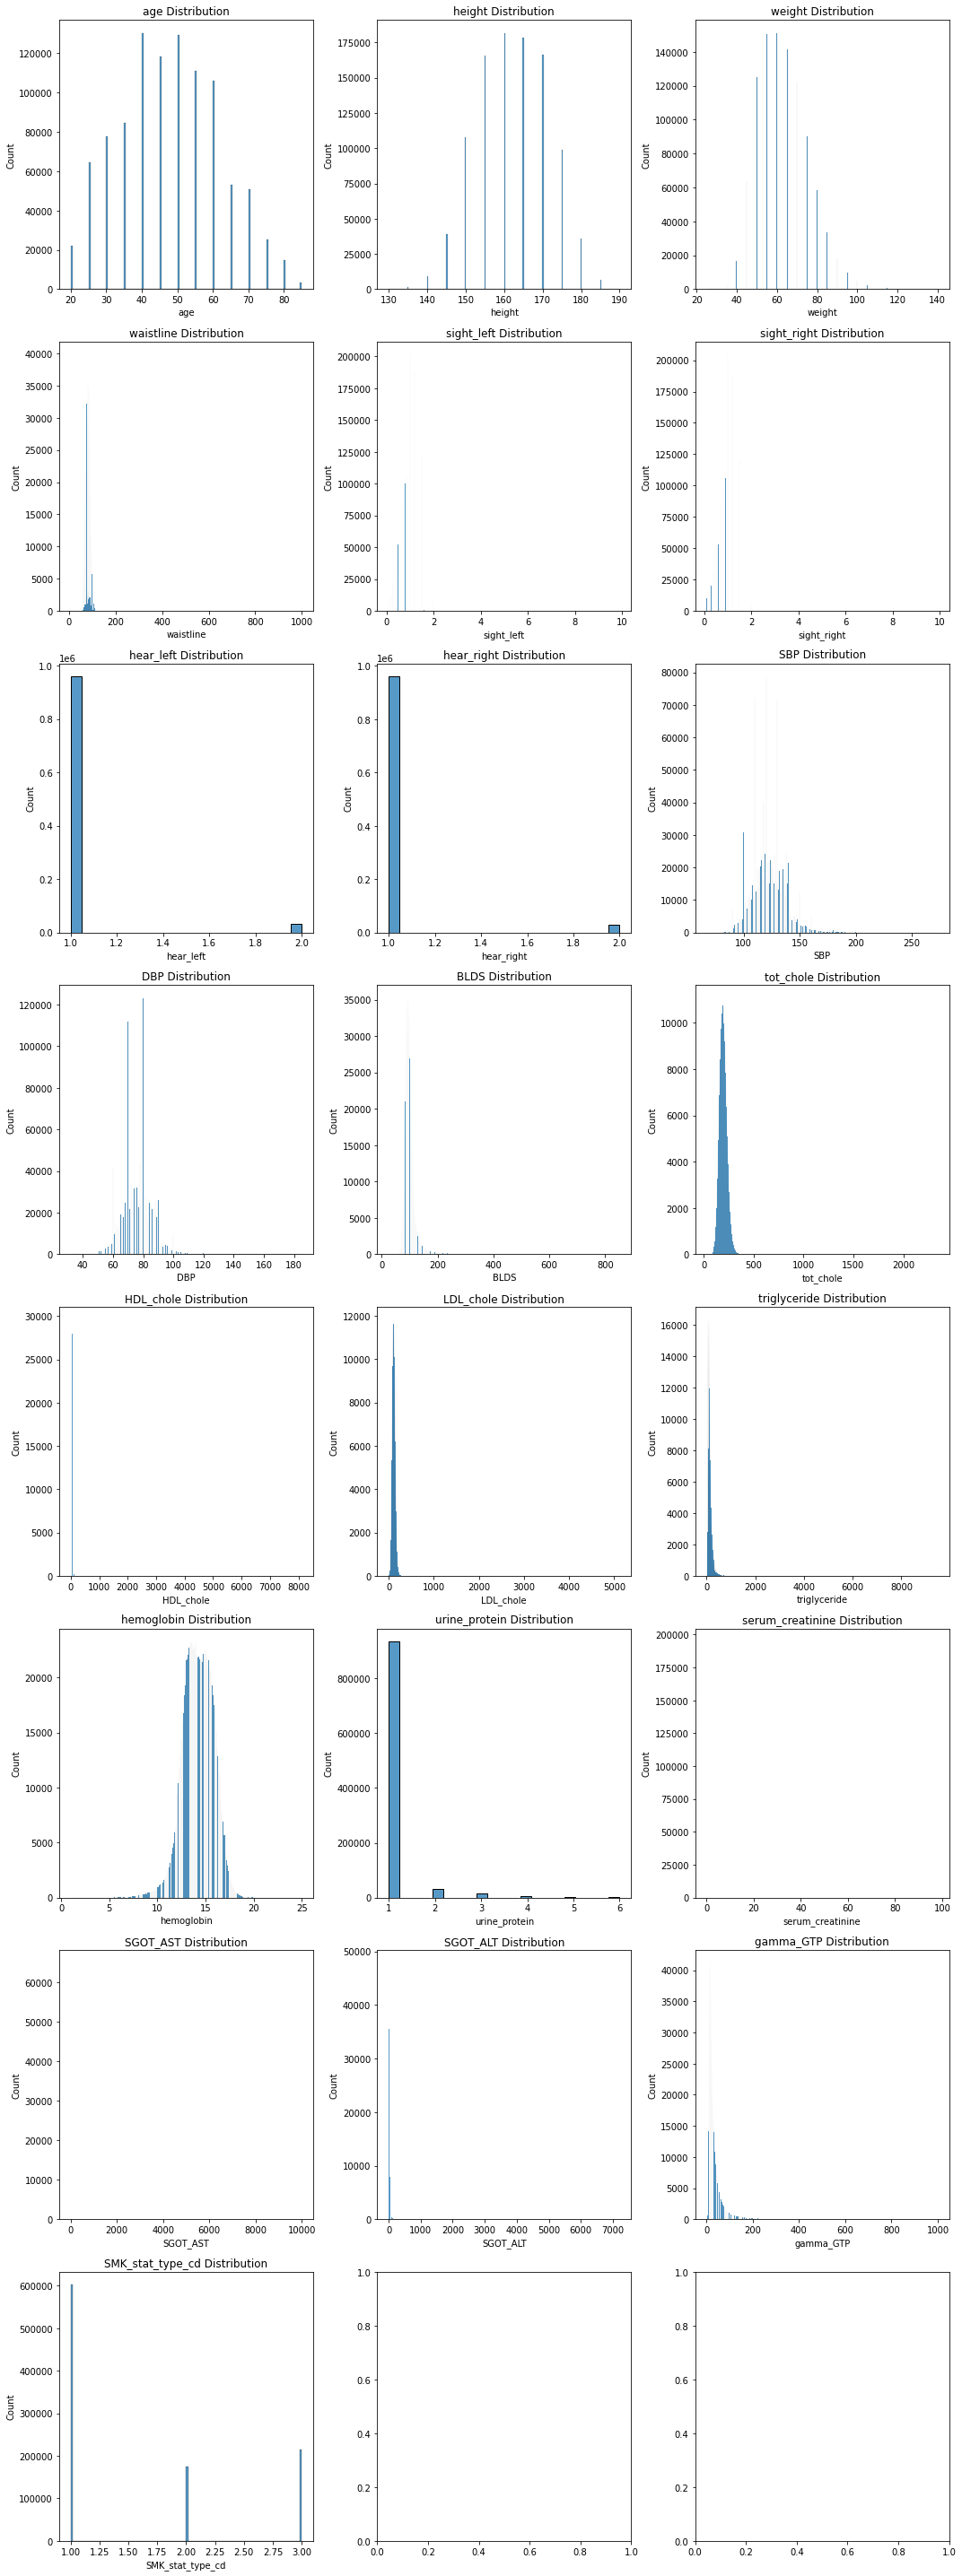

In [14]:
# select numeric columns for distribution analysis
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("\nnumeric columns:")
plot_numerical_distributions(df, numeric_columns)

### 2.5 Correlation Analysis

In [10]:
def plot_correlation_matrix(df):
    """
    Plot a correlation heatmap only for numeric features,
    with automatic adjustment based on feature count.

    Parameters:
    - df: pandas DataFrame
    """
    # Keep only numeric columns
    numeric_df = df.select_dtypes(include=['float64', 'int64'])

    # Calculate correlation matrix
    corr = numeric_df.corr()

    # Mask upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))
    n_features = corr.shape[0]

    # Auto settings
    if n_features <= 20:
        figsize = (10, 8)
        annot = True
        fontsize = 10
    elif n_features <= 50:
        figsize = (14, 10)
        annot = True
        fontsize = 7
    else:
        figsize = (18, 14)
        annot = False
        fontsize = 6

    # Plot
    plt.figure(figsize=figsize)
    sns.heatmap(
        corr,
        mask=mask,
        cmap='coolwarm',
        vmin=-1,
        vmax=1,
        center=0,
        annot=annot,
        fmt=".2f",
        annot_kws={"size": fontsize},
        linewidths=0.5,
        cbar_kws={"shrink": 0.8}
    )

    plt.title('Correlation Matrix (Numeric Features Only)', fontsize=16)
    plt.tight_layout()
    plt.show()


correlation analysis:


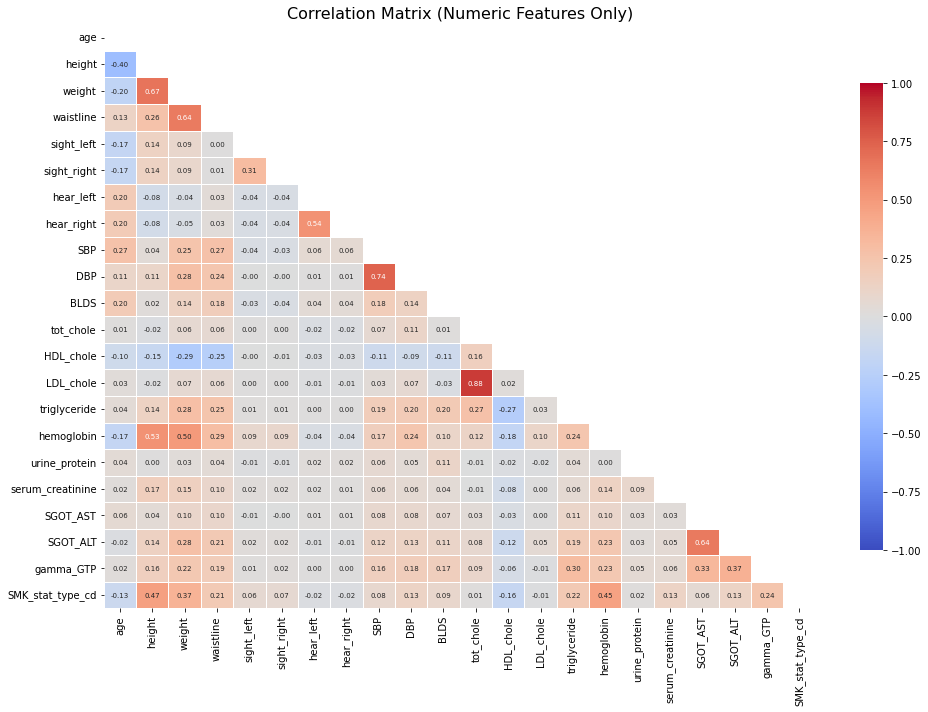

In [11]:
print("\ncorrelation analysis:")
plot_correlation_matrix(df)

### 2.6 Detect Outliers

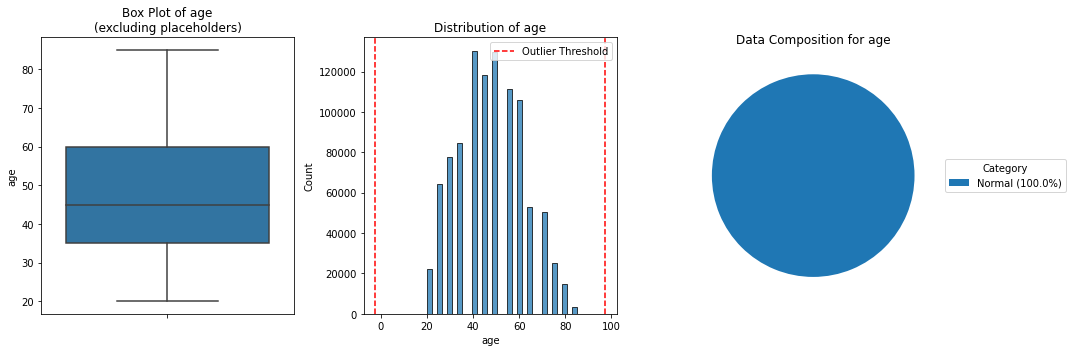


Analysis for age:
--------------------------------------------------
Total records: 991346
Normal values: 991346 (100.00%)
Outliers: 0 (0.00%)
Placeholders: 0 (0.00%)
Value range (excluding outliers and placeholders): 20.00 to 85.00


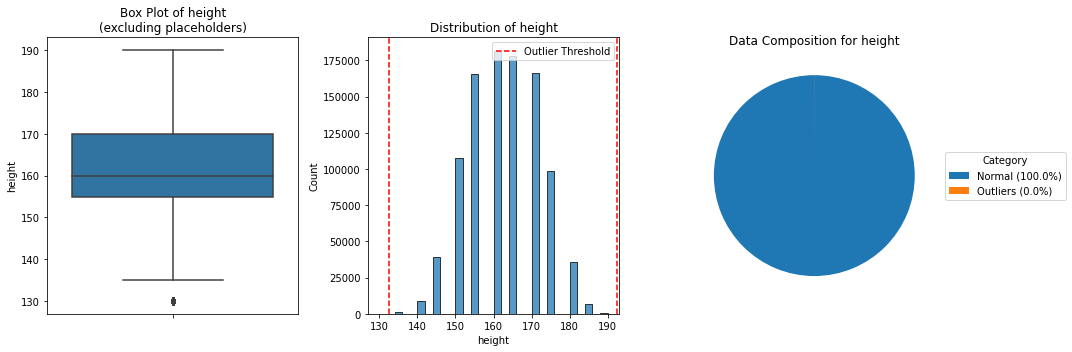


Analysis for height:
--------------------------------------------------
Total records: 991346
Normal values: 991260 (99.99%)
Outliers: 86 (0.01%)
Placeholders: 0 (0.00%)
Value range (excluding outliers and placeholders): 130.00 to 190.00


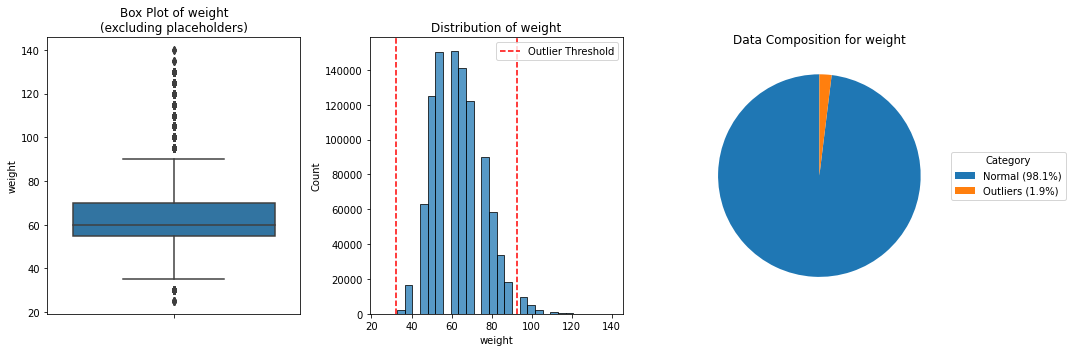


Analysis for weight:
--------------------------------------------------
Total records: 991346
Normal values: 972125 (98.06%)
Outliers: 19221 (1.94%)
Placeholders: 0 (0.00%)
Value range (excluding outliers and placeholders): 25.00 to 140.00


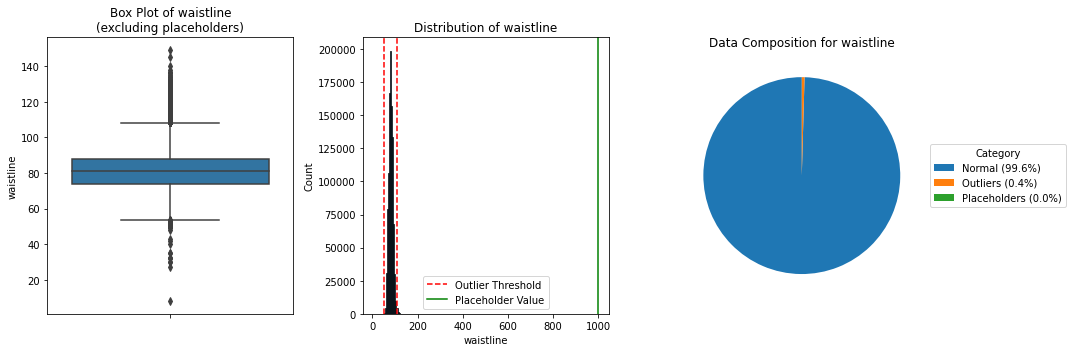


Analysis for waistline:
--------------------------------------------------
Total records: 991346
Normal values: 986929 (99.55%)
Outliers: 4360 (0.44%)
Placeholders: 57 (0.01%)
Value range (excluding outliers and placeholders): 8.00 to 149.10
Placeholder value used: 999


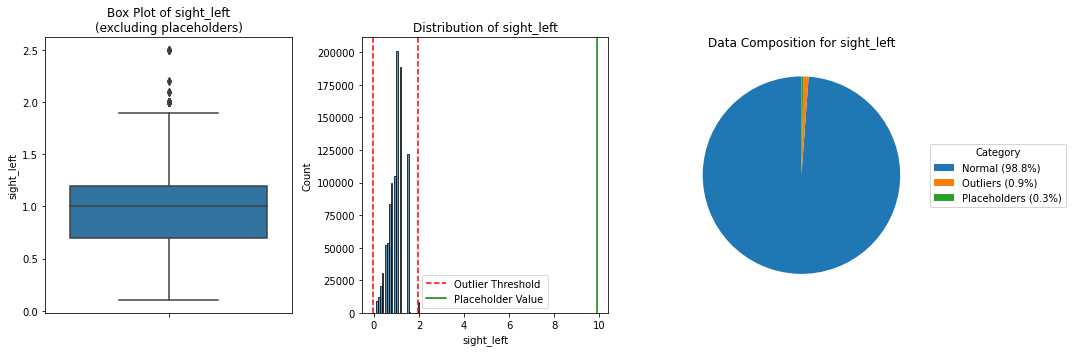


Analysis for sight_left:
--------------------------------------------------
Total records: 991346
Normal values: 979764 (98.83%)
Outliers: 8464 (0.85%)
Placeholders: 3118 (0.31%)
Value range (excluding outliers and placeholders): 0.10 to 2.50
Placeholder value used: 9.9


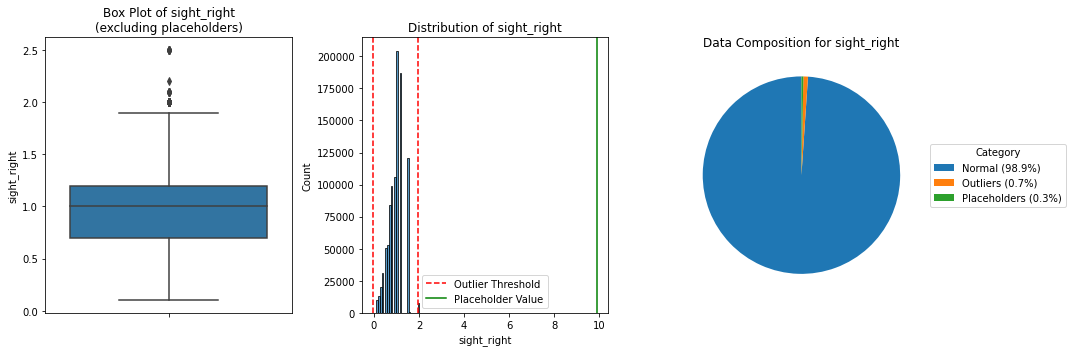


Analysis for sight_right:
--------------------------------------------------
Total records: 991346
Normal values: 980851 (98.94%)
Outliers: 7384 (0.74%)
Placeholders: 3111 (0.31%)
Value range (excluding outliers and placeholders): 0.10 to 2.50
Placeholder value used: 9.9


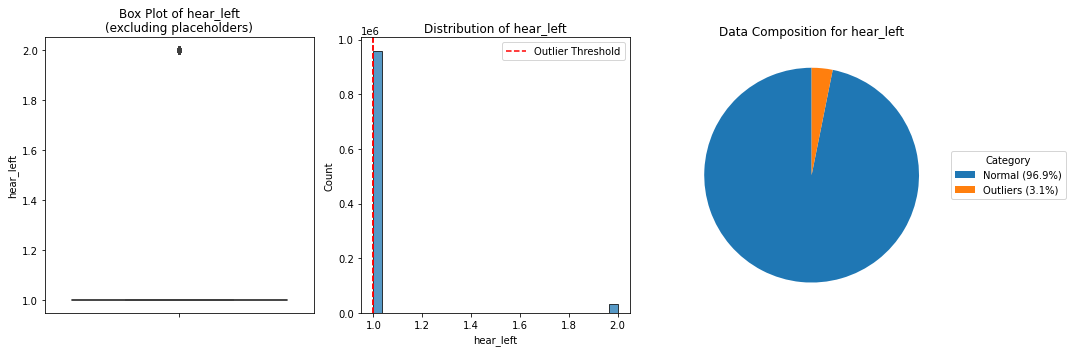


Analysis for hear_left:
--------------------------------------------------
Total records: 991346
Normal values: 960124 (96.85%)
Outliers: 31222 (3.15%)
Placeholders: 0 (0.00%)
Value range (excluding outliers and placeholders): 1.00 to 2.00


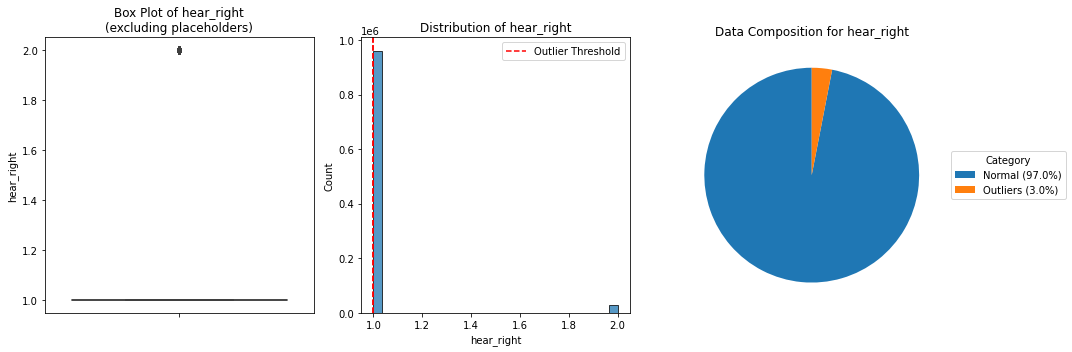


Analysis for hear_right:
--------------------------------------------------
Total records: 991346
Normal values: 961134 (96.95%)
Outliers: 30212 (3.05%)
Placeholders: 0 (0.00%)
Value range (excluding outliers and placeholders): 1.00 to 2.00


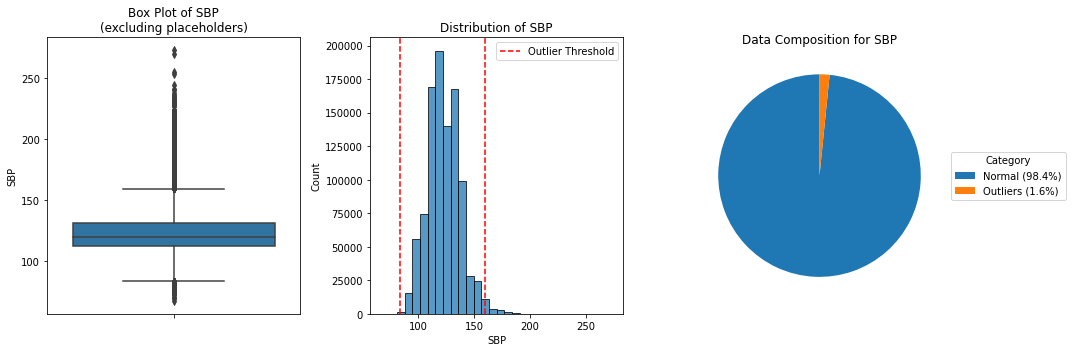


Analysis for SBP:
--------------------------------------------------
Total records: 991346
Normal values: 975510 (98.40%)
Outliers: 15836 (1.60%)
Placeholders: 0 (0.00%)
Value range (excluding outliers and placeholders): 67.00 to 273.00


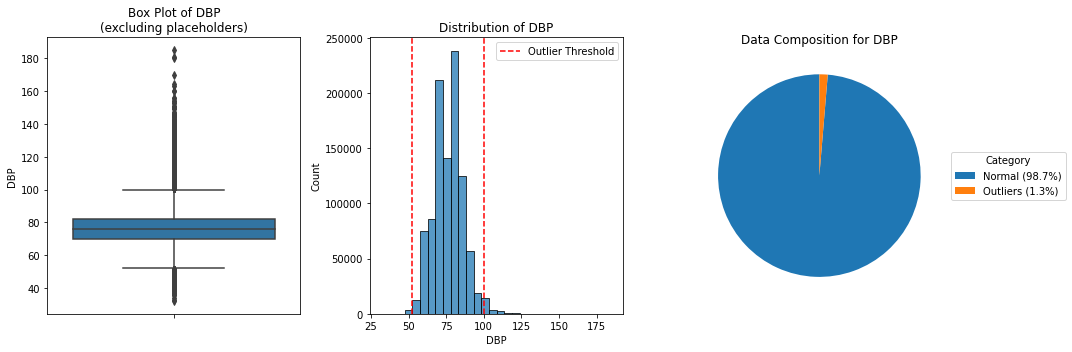


Analysis for DBP:
--------------------------------------------------
Total records: 991346
Normal values: 978224 (98.68%)
Outliers: 13122 (1.32%)
Placeholders: 0 (0.00%)
Value range (excluding outliers and placeholders): 32.00 to 185.00


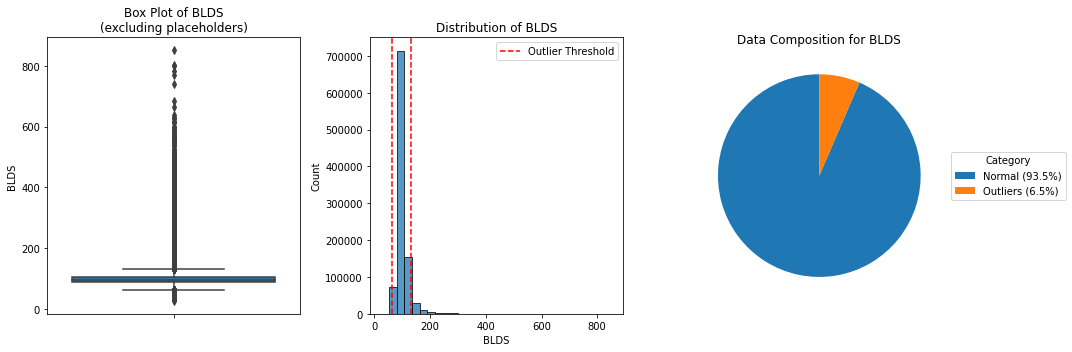


Analysis for BLDS:
--------------------------------------------------
Total records: 991346
Normal values: 927144 (93.52%)
Outliers: 64202 (6.48%)
Placeholders: 0 (0.00%)
Value range (excluding outliers and placeholders): 25.00 to 852.00


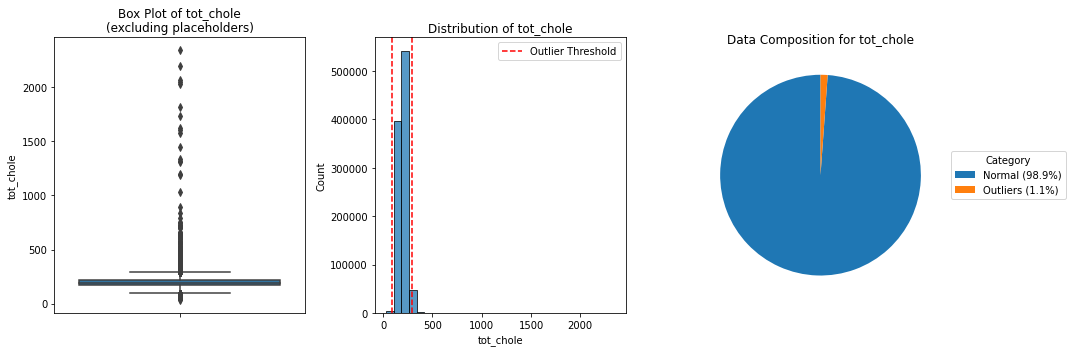


Analysis for tot_chole:
--------------------------------------------------
Total records: 991346
Normal values: 980048 (98.86%)
Outliers: 11298 (1.14%)
Placeholders: 0 (0.00%)
Value range (excluding outliers and placeholders): 30.00 to 2344.00


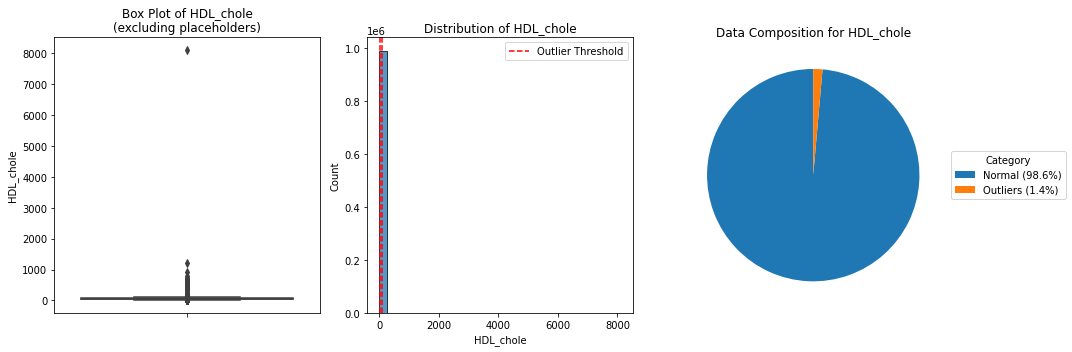


Analysis for HDL_chole:
--------------------------------------------------
Total records: 991346
Normal values: 977488 (98.60%)
Outliers: 13858 (1.40%)
Placeholders: 0 (0.00%)
Value range (excluding outliers and placeholders): 1.00 to 8110.00


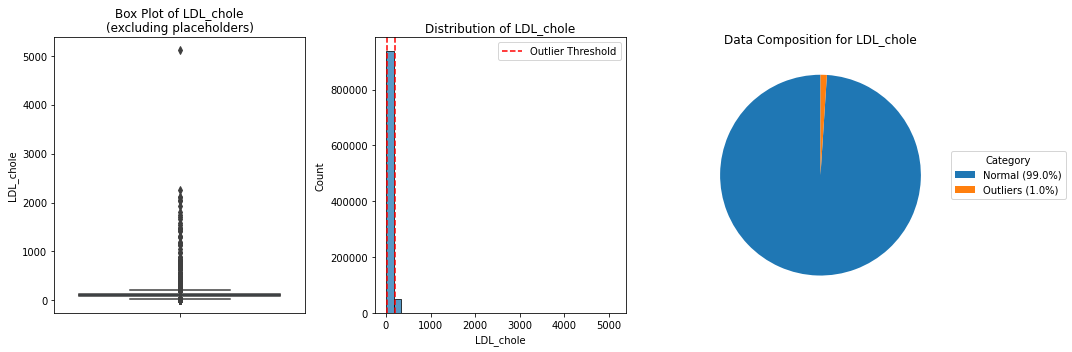


Analysis for LDL_chole:
--------------------------------------------------
Total records: 991346
Normal values: 981248 (98.98%)
Outliers: 10098 (1.02%)
Placeholders: 0 (0.00%)
Value range (excluding outliers and placeholders): 1.00 to 5119.00


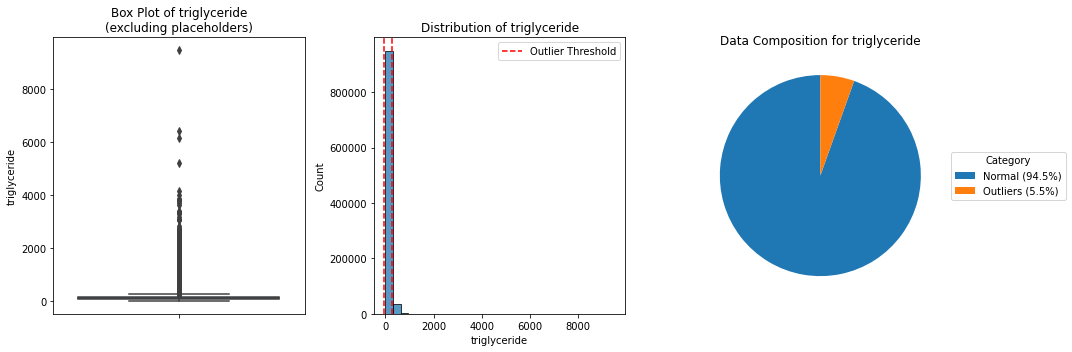


Analysis for triglyceride:
--------------------------------------------------
Total records: 991346
Normal values: 937242 (94.54%)
Outliers: 54104 (5.46%)
Placeholders: 0 (0.00%)
Value range (excluding outliers and placeholders): 1.00 to 9490.00


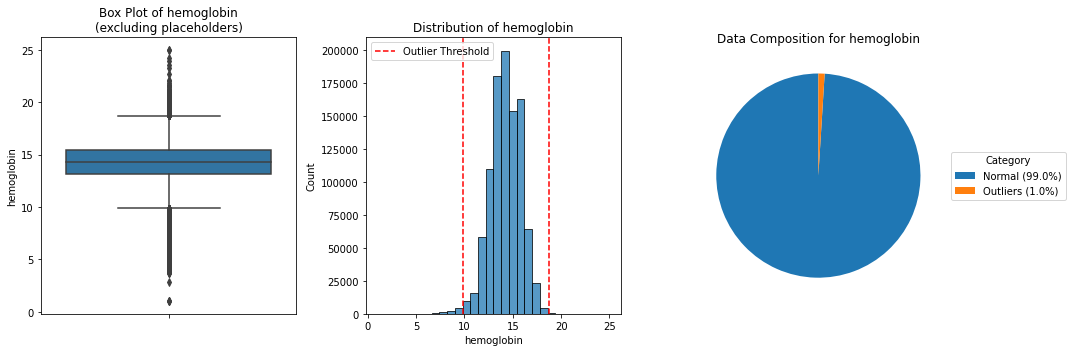


Analysis for hemoglobin:
--------------------------------------------------
Total records: 991346
Normal values: 981586 (99.02%)
Outliers: 9760 (0.98%)
Placeholders: 0 (0.00%)
Value range (excluding outliers and placeholders): 1.00 to 25.00


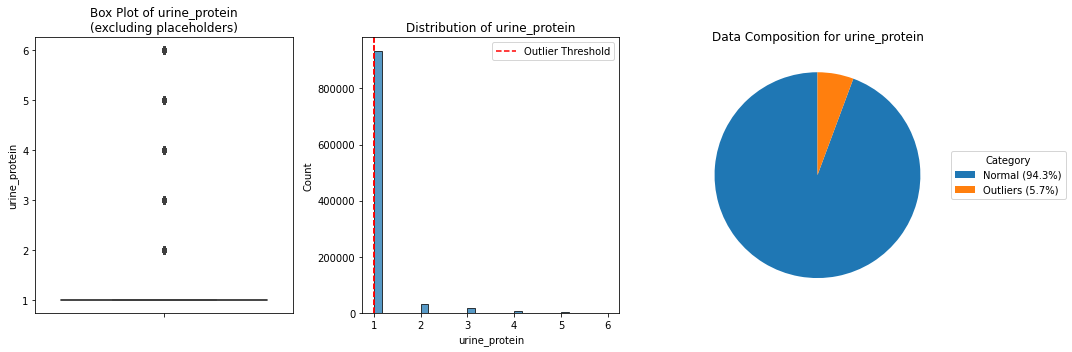


Analysis for urine_protein:
--------------------------------------------------
Total records: 991346
Normal values: 935175 (94.33%)
Outliers: 56171 (5.67%)
Placeholders: 0 (0.00%)
Value range (excluding outliers and placeholders): 1.00 to 6.00


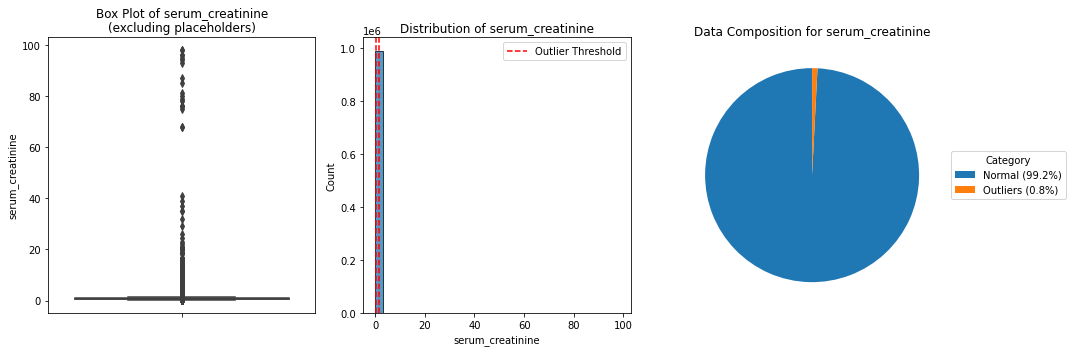


Analysis for serum_creatinine:
--------------------------------------------------
Total records: 991346
Normal values: 983341 (99.19%)
Outliers: 8005 (0.81%)
Placeholders: 0 (0.00%)
Value range (excluding outliers and placeholders): 0.10 to 98.00


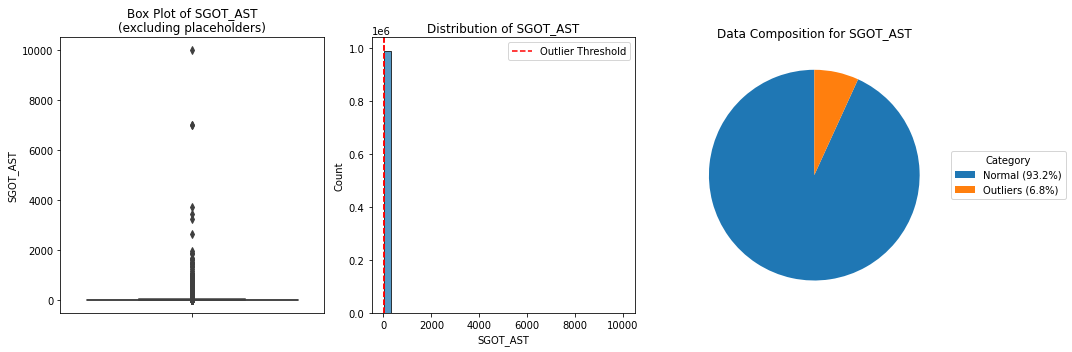


Analysis for SGOT_AST:
--------------------------------------------------
Total records: 991346
Normal values: 923732 (93.18%)
Outliers: 67614 (6.82%)
Placeholders: 0 (0.00%)
Value range (excluding outliers and placeholders): 1.00 to 9999.00


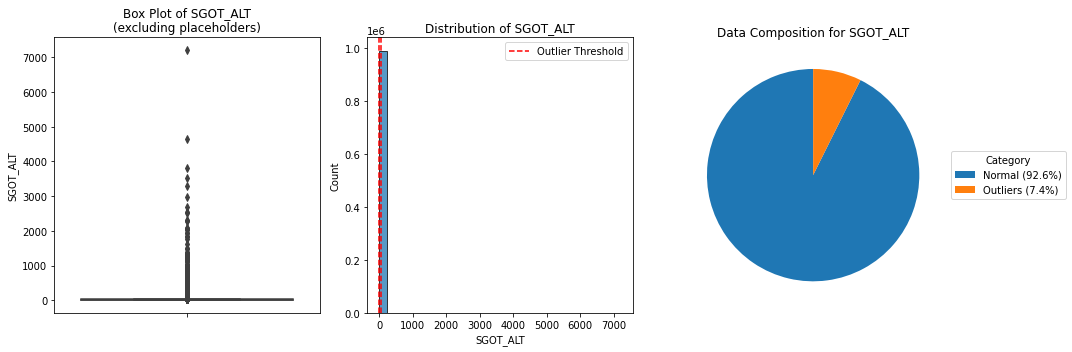


Analysis for SGOT_ALT:
--------------------------------------------------
Total records: 991346
Normal values: 918418 (92.64%)
Outliers: 72928 (7.36%)
Placeholders: 0 (0.00%)
Value range (excluding outliers and placeholders): 1.00 to 7210.00


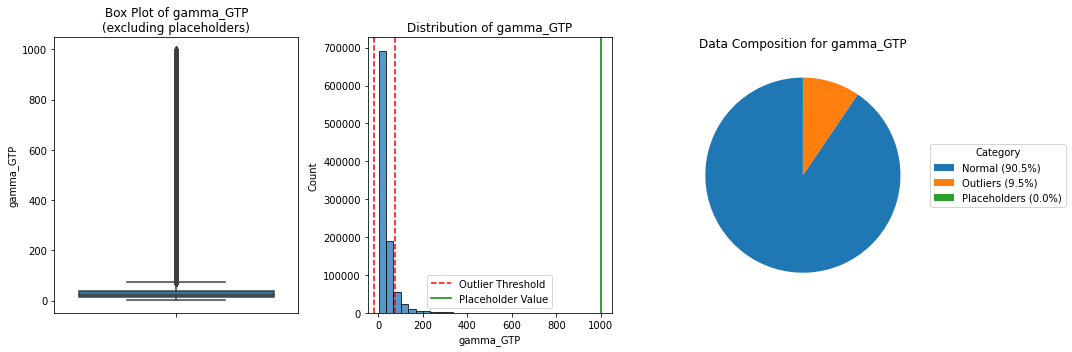


Analysis for gamma_GTP:
--------------------------------------------------
Total records: 991346
Normal values: 897204 (90.50%)
Outliers: 93903 (9.47%)
Placeholders: 239 (0.02%)
Value range (excluding outliers and placeholders): 1.00 to 998.00
Placeholder value used: 999


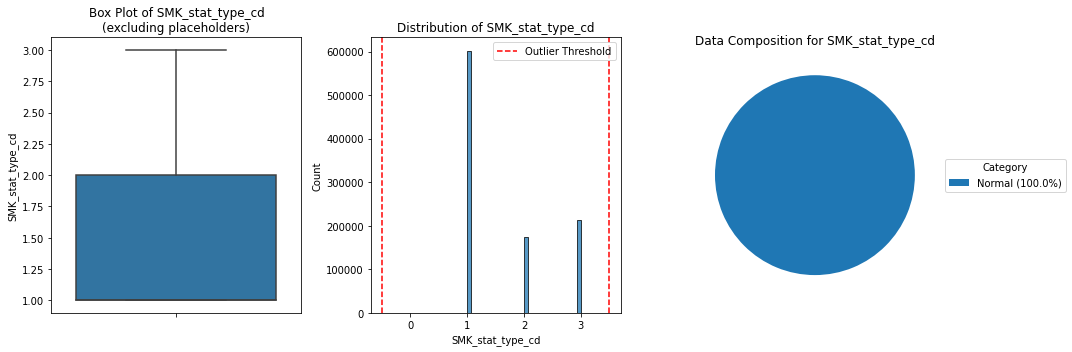


Analysis for SMK_stat_type_cd:
--------------------------------------------------
Total records: 991346
Normal values: 991346 (100.00%)
Outliers: 0 (0.00%)
Placeholders: 0 (0.00%)
Value range (excluding outliers and placeholders): 1.00 to 3.00


In [ ]:
def detect_outliers_and_placeholders(df, columns):
    """
    Detect both outliers and placeholder values in the dataset
    """
    results = {}  # Dictionary to store results for each column
    
    # Define known placeholder values
    placeholders = {
        'waistline': 999,
        'sight_left': 9.9,
        'sight_right': 9.9,
        'gamma_GTP': 999 #Anyi0426 *Added
        # 'column_name': placeholder_value,
    }
    
    for col in columns:
        # Only proceed if the column is of numeric type
        if df[col].dtype in ['int64', 'float64']:
            # Initialize results dictionary for this column
            results[col] = {
                'outliers': 0,
                'placeholders': 0,
                'outlier_percentage': 0,
                'placeholder_percentage': 0
            }
            
            # Check for placeholder values first
            if col in placeholders:
                placeholder_mask = df[col] == placeholders[col]
                placeholder_count = placeholder_mask.sum()
                
                # Remove placeholder values for outlier detection
                df_clean = df[~placeholder_mask]
            else:
                placeholder_count = 0
                df_clean = df
            
            # Calculate quartiles excluding placeholder values
            Q1 = df_clean[col].quantile(0.25)
            Q3 = df_clean[col].quantile(0.75)
            IQR = Q3 - Q1
            
            # Define bounds for outliers
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Count outliers (excluding placeholder values)
            outlier_count = df_clean[(df_clean[col] < lower_bound) | 
                                   (df_clean[col] > upper_bound)][col].count()
            
            # Store results
            total_rows = len(df)
            results[col]['outliers'] = outlier_count
            results[col]['placeholders'] = placeholder_count
            results[col]['outlier_percentage'] = (outlier_count / total_rows) * 100
            results[col]['placeholder_percentage'] = (placeholder_count / total_rows) * 100
            
            # Visualization for this column
            plt.figure(figsize=(15, 5))
            
            # Plot 1: Box Plot (excluding placeholders)
            plt.subplot(131)
            sns.boxplot(y=df_clean[col])
            plt.title(f'Box Plot of {col}\n(excluding placeholders)')
            
            # Plot 2: Distribution
            plt.subplot(132)
            sns.histplot(data=df_clean, x=col, bins=30)
            plt.axvline(x=lower_bound, color='r', linestyle='--', label='Outlier Threshold')
            plt.axvline(x=upper_bound, color='r', linestyle='--')
            if col in placeholders:
                plt.axvline(x=placeholders[col], color='g', linestyle='-', 
                          label='Placeholder Value')
            plt.title(f'Distribution of {col}')
            plt.legend()
            
            # Plot 3: Improved Pie Chart for Small Values
            
            plt.subplot(133)
            normal_count = total_rows - outlier_count - placeholder_count
            sizes = [normal_count, outlier_count, placeholder_count]
            labels = ['Normal', 'Outliers', 'Placeholders']

            # Filter out zero-size categories
            sizes_nonzero = [size for size in sizes if size > 0]
            labels_nonzero = [label for size, label in zip(sizes, labels) if size > 0]

            # Compute percentages manually
            total = sum(sizes_nonzero)
            percentages = [size / total * 100 for size in sizes_nonzero]

            # Build legend labels with percentages
            legend_labels = [f"{label} ({pct:.1f}%)" for label, pct in zip(labels_nonzero, percentages)]

            # Handle case when everything is zero
            if len(sizes_nonzero) == 0:
                sizes_nonzero = [1]
                legend_labels = ['No Data']

            # Plot pie chart without labels or percentages
            wedges, _ = plt.pie(
                sizes_nonzero,
                startangle=90,
                labels=None,          # No label inside pie
                autopct=None,          # No percentage inside pie
                textprops={'fontsize': 10}
            )

            # Add a clean legend with category names and percentages
            plt.legend(
                wedges, legend_labels,
                title="Category",
                loc="center left",
                bbox_to_anchor=(1, 0, 0.5, 1),
                fontsize=10
            )

            plt.title(f'Data Composition for {col}')
            plt.tight_layout()
            plt.show()
            
            # Print detailed statistics
            print(f"\nAnalysis for {col}:")
            print("-" * 50)
            print(f"Total records: {total_rows}")
            print(f"Normal values: {normal_count} ({normal_count/total_rows*100:.2f}%)")
            print(f"Outliers: {outlier_count} ({results[col]['outlier_percentage']:.2f}%)")
            print(f"Placeholders: {placeholder_count} ({results[col]['placeholder_percentage']:.2f}%)")
            print(f"Value range (excluding outliers and placeholders): {df_clean[col].min():.2f} to {df_clean[col].max():.2f}")
            
            if col in placeholders:
                print(f"Placeholder value used: {placeholders[col]}")
    
    return results

# Function
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
results = detect_outliers_and_placeholders(df, numeric_columns)


### 2.7 Categorical Variable Analysis


categorical variable analysis:

sex distribution:
Male      526415
Female    464931
Name: sex, dtype: int64


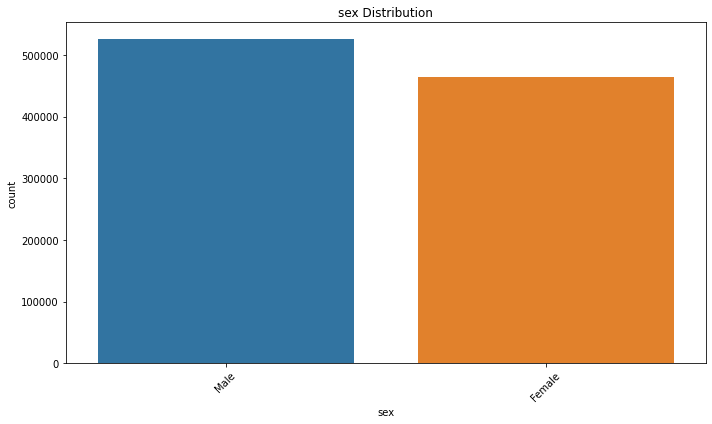


DRK_YN distribution:
N    495858
Y    495488
Name: DRK_YN, dtype: int64


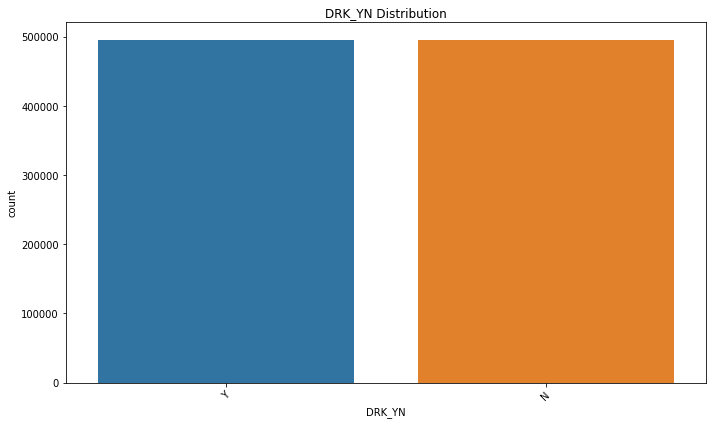

In [13]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
if len(categorical_columns) > 0:
    print("\ncategorical variable analysis:")
    for col in categorical_columns:
        print(f"\n{col} distribution:")
        print(df[col].value_counts())
        
        plt.figure(figsize=(10, 6))
        sns.countplot(data=df, x=col)
        plt.title(f'{col} Distribution')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()